## Test that the Policy Gradient model learns to play tic tac toe: 
### 1. 1000 (epochs) x 30 (batch size) ~ 30k > 3^9 ~ 20k so the agent will have probably seen every possible board position. Training takes about 6 mins.
### 2. learning rate = 0.1

## A. Baseline model with zero learning(i.e. learning rate set to zero):

In [1]:
import numpy as np
import tensorflow as tf
from tic_tac_learning import simulator
from tic_tac_pg import policy_gradients
from stochastician import stochastician as CS
from tic_tac_system import tic_tac_system
from evaluation import game_evaluation as G

G = G()

tf.reset_default_graph()

pg_model = policy_gradients(lr=0.0001,seed=42,batch_size=10,max_iter=5)

tic_tac = tic_tac_system(G,model=pg_model,opponent=CS,epochs=2000,depth=5,gamma=0.9)

scores = simulator(tic_tac)

2.258125e-09
0.0001016463
0.00023814673
0.0003278011
0.00038932113
0.00043579936
0.00047071226
0.000499207
0.0005225516
0.00054311403
0.00056131586
0.0005774403
0.00059151254
0.000604599
0.00061690283
0.0006287181
0.0006398982
0.0006501407
0.00066048215
0.0006703726
0.00067995914
0.00068888796
0.0006979348
0.0007067428
0.0007155085
0.00072387053
0.00073245075
0.00074080075
0.0007492999
0.0007573665
0.0007654839
0.0007734059
0.0007815968
0.00078965764
0.00079747644
0.0008055262
0.00081337284
0.0008214663
0.0008291189
0.0008373872
0.00084532687
0.0008534262
0.0008612352
0.0008690744
0.00087709416
0.000884842
0.00089251227
0.000900342
0.00090819236
0.0009155891
0.00092321914
0.00093081914
0.00093824667
0.0009461601
0.0009539782
0.0009615416
0.00096914254
0.0009769733
0.0009847865
0.0009925424
0.000999995
0.0010077872
0.0010156026
0.0010232655
0.0010311033
0.0010389534
0.0010464862
0.0010540676
0.0010614218
0.0010690661
0.0010768747
0.0010845322
0.0010921913
0.0010997833
0.0011073035
0.001

/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


## Analyse win-rate progression: 

In [2]:
learning = np.zeros(10)

for i in range(10):
    
        learning[i] = np.mean((scores[i*100:(i+1)*100]+5.0)/10)

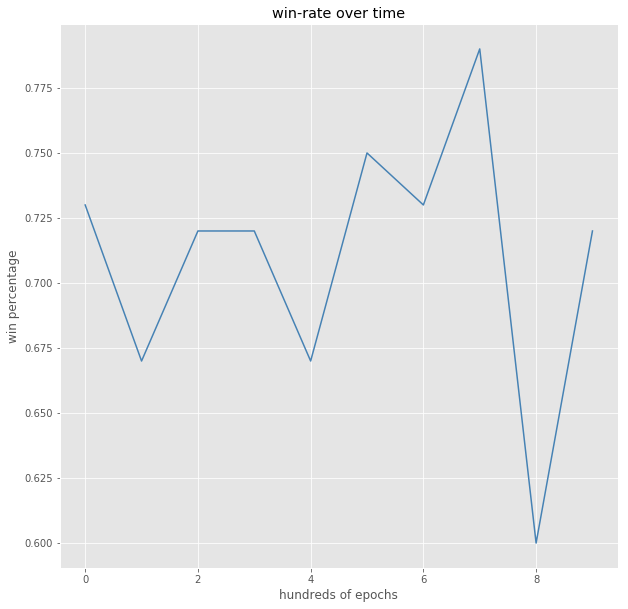

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(10,10)) 

plt.plot(learning,color='steelblue')

plt.title('win-rate over time')
plt.xlabel('hundreds of epochs')
plt.ylabel('win percentage')

plt.show()

In [4]:
np.mean(learning[:5]),np.mean(learning[5:10])

(0.702, 0.718)

## The win-rate converges to 87% which is pretty good. 

## B. Using simple softmax probability calculations: 

In [ ]:
import numpy as np
import tensorflow as tf
from tic_tac_learning import simulator
from tic_tac_pg import policy_gradients
from stochastician import stochastician as CS
from tic_tac_system import tic_tac_system
from evaluation import game_evaluation as G

tf.reset_default_graph()

G = G()

pg_model = policy_gradients(lr=0.01,seed=42,batch_size=30)

tic_tac = tic_tac_system(G,model=pg_model,opponent=CS,epochs=2000,depth=5,gamma=0.9)

scores = simulator(tic_tac)

## Analyse the win-rate progression: 

In [ ]:
learning = np.zeros(20)

for i in range(20):
    
    learning[i] = np.mean((scores[i*100:(i+1)*100]+5.0)/10)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(10,10)) 

plt.plot(learning,color='steelblue')

plt.title('win-rate over time')
plt.xlabel('hundreds of epochs')
plt.ylabel('win percentage')

plt.show()

In [ ]:
np.mean(learning[:5]), np.mean(learning[5:10]),np.mean(learning[10:15]),np.mean(learning[15:20])

### The win rate appears to converge to 74% and then it starts to go down a bit. Perhaps a decreasing learning rate might help. 